# Задание 1, 2 

In [1]:
import pandas as pd

In [2]:
BAR = pd.read_csv('brent_prices.csv', sep=';')
RUB = pd.read_csv('dollar_curs.csv', sep=';')
INR = pd.read_csv('indian_curs.csv', sep=';')

#### Вывод данных из ДатаФреймов

In [3]:
BAR.head()

,<TICKER>,<PER>,<DATE>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
0,ICE.BRN,M,20180901,77.69,83.41,75.64,82.98,3141389
1,ICE.BRN,M,20181001,82.97,86.74,74.58,74.59,4406167
2,ICE.BRN,M,20181101,74.69,74.99,57.78,59.07,4333185
3,ICE.BRN,M,20181201,59.98,63.73,50.22,54.15,3459773
4,ICE.BRN,M,20190101,54.12,63.15,52.51,61.22,3659813


In [4]:
RUB.head()

,curs,nominal,date
0,65.854527,1.0,2018-10-01
1,66.355681,1.0,2018-11-01
2,67.335314,1.0,2018-12-01
3,66.512544,1.0,2019-01-01
4,65.810525,1.0,2019-02-01


In [5]:
INR.head()

,curs,nominal,date
0,89.510109,100.0,2018-10-01
1,92.270848,100.0,2018-11-01
2,95.322173,100.0,2018-12-01
3,93.633431,100.0,2019-01-01
4,92.382145,100.0,2019-02-01


#### На данный момент имеем: 
BAR к доллару, Доллар к RUB, 100 Индийских рупий к Рублю. 
Приведём все данные к одной величине

#### 1 рубль - n долларов

In [6]:
RUB['curs'] = 1 / RUB['curs'] 

In [7]:
RUB.head()

,curs,nominal,date
0,0.015185,1.0,2018-10-01
1,0.015070,1.0,2018-11-01
2,0.014851,1.0,2018-12-01
3,0.015035,1.0,2019-01-01
4,0.015195,1.0,2019-02-01


#### 1 рупия - k долларов 
Массивы одинакового размера, поэтому так делать можно

In [8]:
INR['curs'] = INR['curs'] * RUB['curs'] / 100

In [9]:
INR.head()

,curs,nominal,date
0,0.013592,100.0,2018-10-01
1,0.013905,100.0,2018-11-01
2,0.014156,100.0,2018-12-01
3,0.014078,100.0,2019-01-01
4,0.014038,100.0,2019-02-01


#### Соберёмся всё в 1 ДатаФрейм

In [10]:
df = pd.DataFrame({'BAR': BAR['<CLOSE>'], 'RUB': RUB['curs'], 'INR': INR['curs']})

In [11]:
df.head()

,BAR,RUB,INR
0,82.98,0.015185,0.013592
1,74.59,0.015070,0.013905
2,59.07,0.014851,0.014156
3,54.15,0.015035,0.014078
4,61.22,0.015195,0.014038


# Задание 3 

In [12]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

### Построение графиков P-P и Q-Q для переменных BAR, RUB, INR

#### BAR

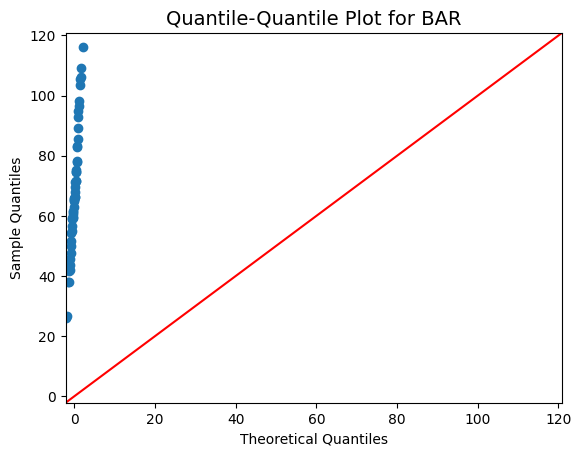

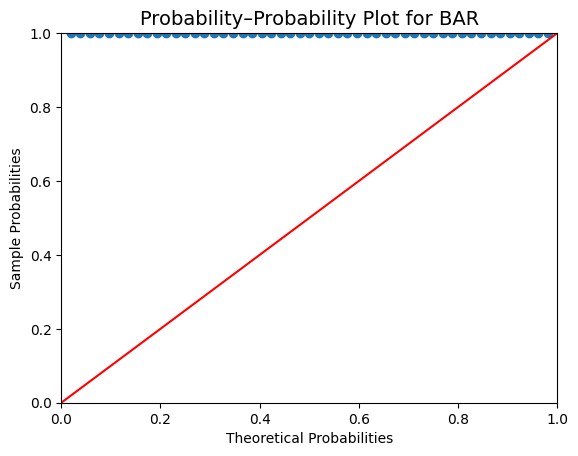

In [13]:
probplot = sm.ProbPlot(df['BAR'])
probplot.qqplot(line = '45')
plt.title('Quantile-Quantile Plot for BAR', fontsize=14)
probplot.ppplot(line = '45')
plt.title('Probability–Probability Plot for BAR', fontsize=14)

plt.show()

#### INR

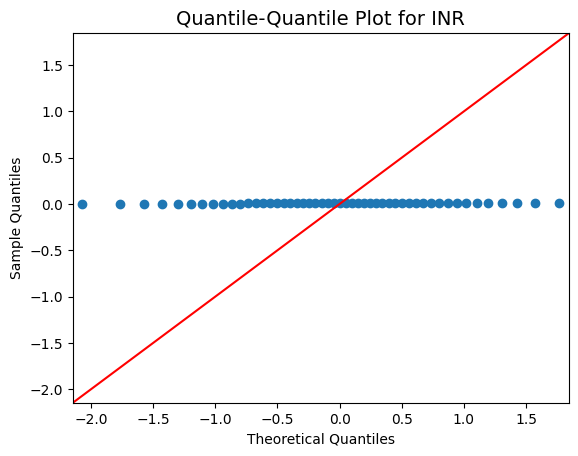

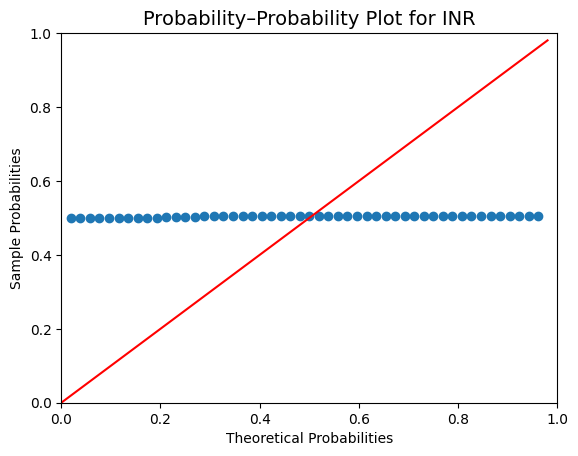

In [14]:
probplot = sm.ProbPlot(df['INR'])
probplot.qqplot(line = '45')
plt.title('Quantile-Quantile Plot for INR', fontsize=14)
probplot.ppplot(line = '45')
plt.title('Probability–Probability Plot for INR', fontsize=14)

plt.show()

#### RUB

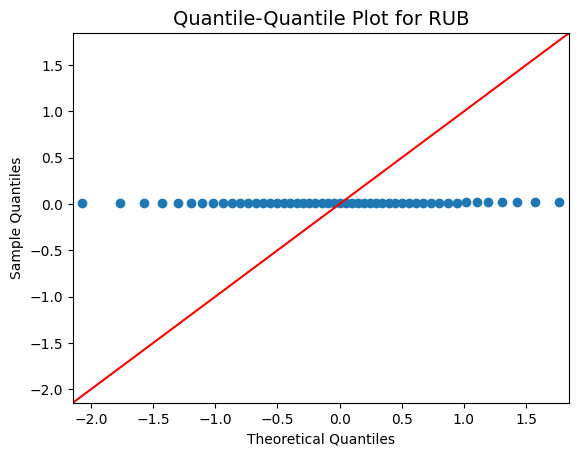

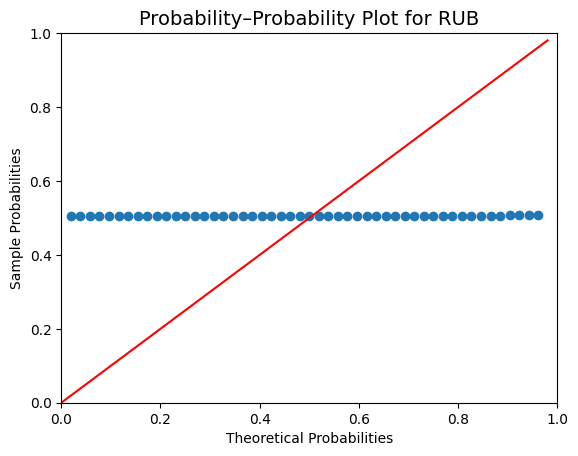

In [15]:
probplot = sm.ProbPlot(df['RUB'])
probplot.qqplot(line = '45')
plt.title('Quantile-Quantile Plot for RUB', fontsize=14)
probplot.ppplot(line = '45')
plt.title('Probability–Probability Plot for RUB', fontsize=14)

plt.show()

### Вывод: требуется стандартизация данных

In [16]:
from sklearn import preprocessing
scaler_std = preprocessing.StandardScaler()
scaler_range = preprocessing.MinMaxScaler()

#### Способ 1

In [17]:
for i in df.columns:
    df[i] = scaler_std.fit_transform(df[[i]])

#### Способ 2

In [18]:
for i in df.columns:
    df[i] = scaler_range.fit_transform(df[[i]])

In [18]:
df.head()

,BAR,RUB,INR
0,0.689864,0.469035,0.674907
1,0.290845,0.389128,0.737750
2,-0.447267,0.236362,0.788051
3,-0.681256,0.364364,0.772253
4,-0.345016,0.476109,0.764239


In [23]:
df = df.dropna()
df.head()

,BAR,RUB,INR
0,0.689864,0.469035,0.674907
1,0.290845,0.389128,0.737750
2,-0.447267,0.236362,0.788051
3,-0.681256,0.364364,0.772253
4,-0.345016,0.476109,0.764239


# Задание 4

#### Нахождение моды, медианы и среднего арифметического 

In [19]:
import statistics as st

In [20]:
def mmm(xxx):
    print("Среднее арифметическое значение столбца ",xxx," равно ",st.mean(df[xxx]))
    print("Медиана столбца ",xxx," равна ",st.median(df[xxx]))
    print("Мода столбца ",xxx," равна ",st.mode(df[xxx]))

In [21]:
def histmmm(xxx):
    fig, ax = plt.subplots()
    ax.vlines(st.mean(df[xxx]), 0, df[xxx].size, colors="Red", label="mean")
    ax.vlines(st.median(df[xxx]), 0, df[xxx].size, colors="Green", label="median")
    ax.vlines(st.mode(df[xxx]), 0, df[xxx].size, colors="Purple", label="mode")
    df[xxx].plot.hist()
    plt.title(f'Data Set Histogram for {xxx}', fontsize=14)
    plt.legend(title="Parameters:")
    plt.show()

#### Проверка для моды вручную:

In [22]:
def check_moda(xxx):
# Создаём пустой словарь, в котором будем считать количество появлений цен
    counts = {}
    for p in df[xxx]:
        if p not in counts:
            counts[p] = 1
        else:  
            counts[p] += 1

# df_count_BAR = pd.DataFrame({'BAR': BAR_counts})
# print(df_count_BAR)
# Проходимся по словарю и ищем максимальное количество повторений
    maxp = 0
    mode_price = None
    for k, v in counts.items():
        if maxp < v:
            maxp = v
            mode_price = k
    print("Мода вручную равна ",mode_price, maxp) 

#### Нахождение средних значений и построение гистограммы:

### BAR

Среднее арифметическое значение столбца  BAR  равно  2.2476573978930864e-16
Медиана столбца  BAR  равна  -0.11625793933405183
Мода столбца  BAR  равна  0.6898636268592696
Мода вручную равна  0.6898636268592696 1


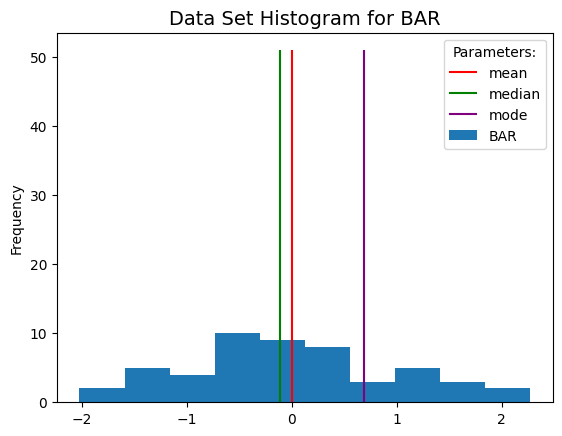

In [23]:
mmm('BAR')
check_moda('BAR')
histmmm('BAR')

### RUB

Среднее арифметическое значение столбца  RUB  равно  nan
Медиана столбца  RUB  равна  -0.041988860216284896
Мода столбца  RUB  равна  0.46903525754915415
Мода вручную равна  0.46903525754915415 1


C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\axes\_base.py:2539: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


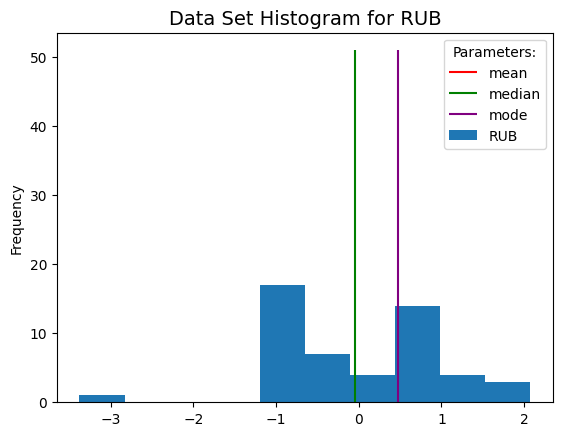

In [24]:
mmm('RUB')
check_moda('RUB')
histmmm('RUB')

### INR

Среднее арифметическое значение столбца  INR  равно  nan
Медиана столбца  INR  равна  0.4782493449086488
Мода столбца  INR  равна  0.6749067583716413
Мода вручную равна  0.6749067583716413 1


C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\axes\_base.py:2539: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


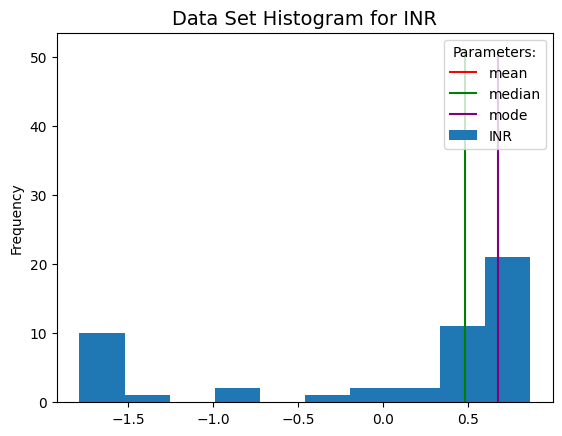

In [25]:
mmm('INR')
check_moda('INR')
histmmm('INR')

### Приблизительное равенство моды и среднего арифметического значения с медианой выполняется, поскольку данное распределение нормализовано

# Задание 5

#### Поскольку у нас 49 наблюдений, то воспользуемся критерием Шапиро-Уилка (7-2000 наблюдений)

In [26]:
from scipy import stats

### Критерий Шапиро-Уилка

### BAR

In [27]:
w = stats.shapiro(list(df['BAR']))
print(w)

ShapiroResult(statistic=0.979246973991394, pvalue=0.5073944330215454)


#### Выбираем уровень значимости 5% (0.05), 
#### Поскольку p-value > 0.05, то гипотеза (распределение нормальное) принимается.

### RUB

In [28]:
w = stats.shapiro(list(df['RUB']))
print(w)

ShapiroResult(statistic=nan, pvalue=1.0)


#### Выбираем уровень значимости 5% (0.05), 
#### Поскольку p-value < 0.05, то гипотеза (распределение нормальное) отвергается.

### INR

In [29]:
w = stats.shapiro(list(df['INR']))
print(w)

ShapiroResult(statistic=nan, pvalue=1.0)


#### Выбираем уровень значимости 5% (0.05), 
#### Поскольку p-value < 0.05, то гипотеза (распределение нормальное) отклоняется.

### Получается, нормальное распределение не выполняется для RUB и INR.

# Задание 6

#### Удаление наиболее заметных выбросов (используя межквартильный диапазон)

In [31]:
Q1 = df.quantile(q=.25)
Q3 = df.quantile(q=.75)
IQR = df.apply(stats.iqr)
#only keep rows in dataframe that have values within 1.5\*IQR of Q1 and Q3
df = df[~((df < (Q1-1.5*IQR)) | (df > (Q3+1.5*IQR))).any(axis=1)]

#find how many rows are left in the dataframe 
df.shape

(51, 3)

### RUB
#### Получили 48 наблюдений, снова воспользуемся критерием Шапиро-Уилка (7-2000 наблюдений)

In [32]:
w = stats.shapiro(list(df['RUB']))
print(w)

ShapiroResult(statistic=nan, pvalue=1.0)


#### Выбираем уровень значимости 5% (0.05), 
#### Поскольку p-value < 0.05, то гипотеза (распределение нормальное) отвергается.
#### Это связано с обработкой данных. Поскольку в некоторых месяцах за 1 число не было значений курса доллара к рублю, поэтому было посчитано среднее значение в каждом месяце 

#### Графическая проверка квартилями

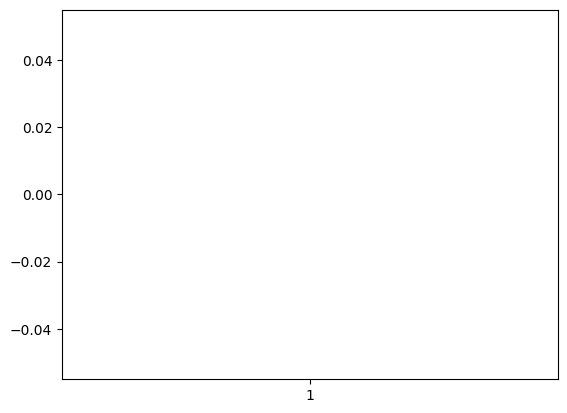

In [33]:
plt.boxplot(df['RUB'].values)
plt.show()

### INR

In [34]:
w = stats.shapiro(list(df['INR']))
print(w)

ShapiroResult(statistic=nan, pvalue=1.0)


#### Выбираем уровень значимости 5% (0.05), 
#### Поскольку p-value < 0.05, то гипотеза (распределение нормальное) отвергается.

#### Графическая проверка квартилями

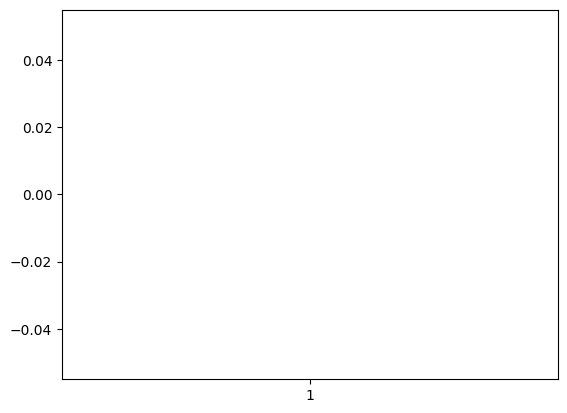

In [35]:
plt.boxplot(df['INR'].values)
plt.show()

# Задание 7

In [ ]:
#Графики взаимной корреляции

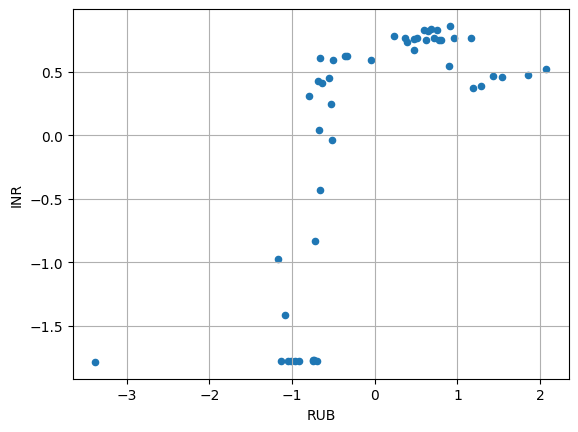

In [40]:
import numpy as np 
    # Ковариационная матрица
# cvm = df[['RUB', 'INR']].cov()
# print(cvm)
xs = df['RUB']
ys = df['INR']
pd.DataFrame(np.array([xs,ys]).T).plot.scatter(0, 1, grid=True)
plt.xlabel('RUB')
plt.ylabel('INR')
plt.show()

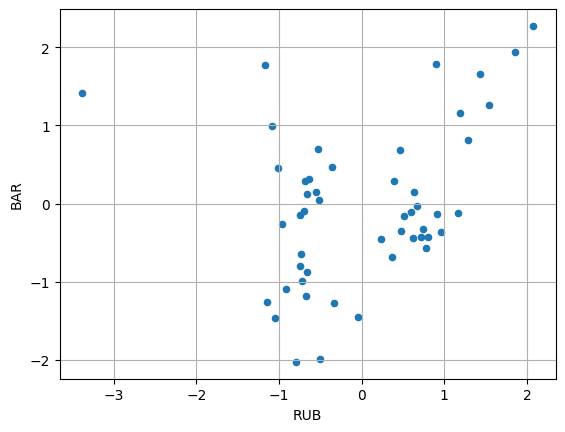

In [41]:
xs = df['RUB']
ys = df['BAR']
pd.DataFrame(np.array([xs,ys]).T).plot.scatter(0, 1, grid=True)
plt.xlabel('RUB')
plt.ylabel('BAR')
plt.show()

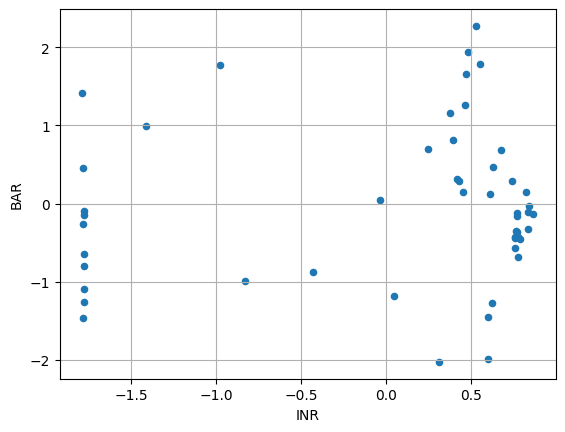

In [42]:
xs = df['INR']
ys = df['BAR']
pd.DataFrame(np.array([xs,ys]).T).plot.scatter(0, 1, grid=True)
plt.xlabel('INR')
plt.ylabel('BAR')
plt.show()

# Задание 8

In [ ]:
#Оценки с помощью методов

In [ ]:
#проверяем на значения NaN

In [46]:
df.head()

,BAR,RUB,INR
0,0.689864,0.469035,0.674907
1,0.290845,0.389128,0.737750
2,-0.447267,0.236362,0.788051
3,-0.681256,0.364364,0.772253
4,-0.345016,0.476109,0.764239


In [47]:
print(df.count)

<bound method DataFrame.count of          BAR       RUB       INR
0   0.689864  0.469035  0.674907
1   0.290845  0.389128  0.737750
2  -0.447267  0.236362  0.788051
3  -0.681256  0.364364  0.772253
4  -0.345016  0.476109  0.764239
5  -0.104368  0.592936  0.832554
6  -0.030177  0.673985  0.837225
7   0.151498  0.638111  0.821529
8  -0.319334  0.746938  0.835952
9  -0.135281  0.909472  0.864231
10 -0.162866  0.512114  0.771592
11 -0.441560  0.614944  0.756613
12 -0.430146  0.712202  0.772396
13 -0.426817  0.798270  0.754729
14 -0.368320  0.960282  0.766129
15 -0.116258  1.160961  0.766654
16 -0.561884  0.779065  0.754718
17 -0.874345 -0.659741 -0.431643
18 -2.023841 -0.791734  0.308361
19 -1.988648 -0.500808  0.599211
20 -1.450282 -0.041989  0.596485
21 -1.276693 -0.338210  0.623228
22 -1.177770 -0.669816  0.045541
23 -1.089311 -0.910424 -1.777812
24 -1.253389 -1.139730 -1.777871
25 -1.455989 -1.043514 -1.780479
26 -0.992291 -0.723068 -0.830520
27 -0.796824 -0.745249 -1.776318
28 -0.6451

In [45]:
np.isnan(df['RUB']).any()
np.isnan(df['INR']).any()

np.isinf(df['RUB']).any()
np.isinf(df['INR']).any()

False

In [53]:
df['RUB'] = np.nan_to_num(df['RUB'])
df['INR'] = np.nan_to_num(df['INR'])
df['BAR'] = np.nan_to_num(df['BAR'])

In [54]:
pr = stats.pearsonr(df['RUB'], df['INR'])
print(pr)
pr = stats.spearmanr(df['RUB'], df['INR'])
print(pr)
pr = stats.kendalltau(df['RUB'], df['INR'])
print(pr)

PearsonRResult(statistic=0.6979930941723361, pvalue=1.247556797536438e-08)
SpearmanrResult(correlation=0.7164705882352941, pvalue=3.3801085889766605e-09)
KendalltauResult(correlation=0.5372549019607844, pvalue=2.6409171747148787e-08)


In [ ]:
#RUB - BAR

In [55]:
pr = stats.pearsonr(df['RUB'], df['BAR'])
print(pr)
pr = stats.spearmanr(df['RUB'], df['BAR'])
print(pr)
pr = stats.kendalltau(df['RUB'], df['BAR'])
print(pr)

PearsonRResult(statistic=0.30472569306701586, pvalue=0.029688094881575033)
SpearmanrResult(correlation=0.30325791855203615, pvalue=0.030523477804130724)
KendalltauResult(correlation=0.22666666666666668, pvalue=0.0189090572780624)


In [ ]:
#BAR - INR

In [56]:
pr = stats.pearsonr(df['BAR'], df['INR'])
print(pr)
pr = stats.spearmanr(df['BAR'], df['INR'])
print(pr)
pr = stats.kendalltau(df['BAR'], df['INR'])
print(pr)

PearsonRResult(statistic=0.09473692999619779, pvalue=0.5084365457468808)
SpearmanrResult(correlation=-0.03276018099547511, pvalue=0.8194785743201106)
KendalltauResult(correlation=-0.013333333333333336, pvalue=0.8901790975587652)


# Задание 9

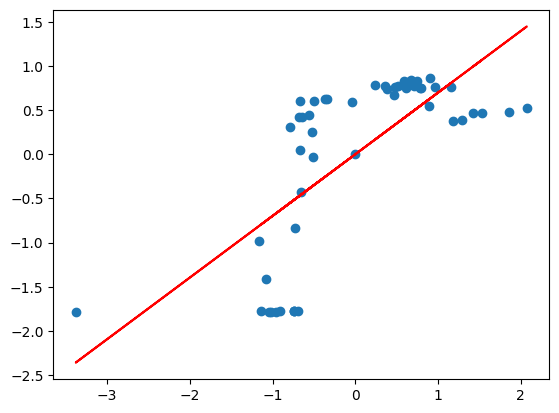

In [59]:
from sklearn import datasets, linear_model

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(df['RUB'].values.reshape(-1,1), df['INR'].values)
y_pred = regr.predict(df['RUB'].values.reshape(-1,1))
plt.plot(df['RUB'].values, y_pred, color = 'red')
plt.scatter(df['RUB'].values, df['INR'].values)
plt.show()

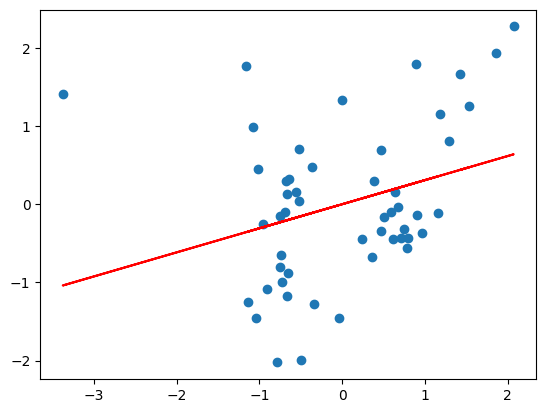

In [60]:
regr.fit(df['RUB'].values.reshape(-1,1), df['BAR'].values)
y_pred = regr.predict(df['RUB'].values.reshape(-1,1))
plt.plot(df['RUB'].values, y_pred, color = 'red')
plt.scatter(df['RUB'].values, df['BAR'].values)
plt.show()

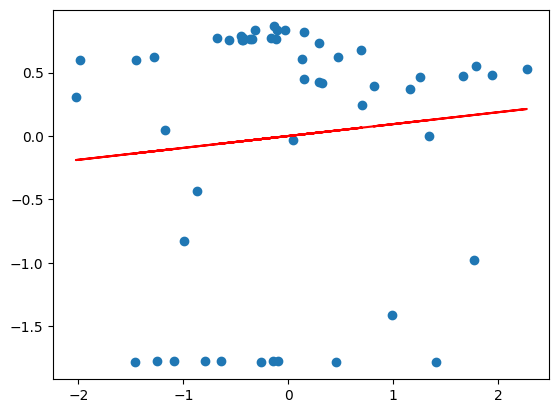

In [61]:
regr.fit(df['BAR'].values.reshape(-1,1), df['INR'].values)
y_pred = regr.predict(df['BAR'].values.reshape(-1,1))
plt.plot(df['BAR'].values, y_pred, color = 'red')
plt.scatter(df['BAR'].values, df['INR'].values)
plt.show()